In [2]:
import pandas as pd


fname = "consumption_history.csv"
df = pd\
    .read_csv(fname, parse_dates=[])

# drop unneccessary column
df.drop(columns=df.columns[0],inplace=True)

# convert date string to datetime type
df[df.columns[0]] = pd.to_datetime(df[df.columns[0]],format="%d/%m/%Y %H:%M")
df[df.columns[1]] = pd.to_datetime(df[df.columns[1]],format="%d/%m/%Y %H:%M")

#
display(df.columns, df.dtypes, df.iloc[417])


# extract a column
# c1 = df[df.columns[2]]

# extract a row
# r1 = df.iloc[1484]
# display(c1,r1)


Index(['Start date/time', 'End date/time', 'Total Consumption (Unit)'], dtype='object')

Start date/time             datetime64[ns]
End date/time               datetime64[ns]
Total Consumption (Unit)           float64
dtype: object

Start date/time             2021-04-10 09:00:00
End date/time               2021-04-10 10:00:00
Total Consumption (Unit)                    0.0
Name: 417, dtype: object

In [3]:
stats = {}
sigma = {}

stats['mean'] = df[df.columns[2]].mean()
stats['median'] = df[df.columns[2]].median()
stats['std'] = df[df.columns[2]].std()

sigma["+2"] = stats['mean']+2*stats['std']
sigma["+1"] = stats['mean']+stats['std']
sigma["-1"] = stats['mean']-stats['std']

display(stats, sigma)

df_1sigma = df[df[df.columns[2]] > sigma['+1']]
df_1sigma = df_1sigma.sort_values(df.columns[2], ascending=False)

df_2sigma = df[df[df.columns[2]] > sigma['+2']]
df_2sigma = df_2sigma.sort_values(df.columns[2], ascending=False)
display(df_2sigma)





{'mean': 0.3981558321807285, 'median': 0.3, 'std': 0.31927083620187097}

{'+2': 1.0366975045844704, '+1': 0.7174266683825994, '-1': 0.07888499597885751}

,Start date/time,End date/time,Total Consumption (Unit)
1484,2021-05-24 20:00:00,2021-05-24 21:00:00,2.0
2152,2021-06-21 16:00:00,2021-06-21 17:00:00,1.9
2153,2021-06-21 17:00:00,2021-06-21 18:00:00,1.8
2155,2021-06-21 19:00:00,2021-06-21 20:00:00,1.8
1411,2021-05-21 19:00:00,2021-05-21 20:00:00,1.8
...,...,...,...
1585,2021-05-29 01:00:00,2021-05-29 02:00:00,1.1
1586,2021-05-29 02:00:00,2021-05-29 03:00:00,1.1
1609,2021-05-30 01:00:00,2021-05-30 02:00:00,1.1
1612,2021-05-30 04:00:00,2021-05-30 05:00:00,1.1


,Start date/time,End date/time,Total Consumption (Unit),zscore
445,2021-04-11 13:00:00,2021-04-11 14:00:00,0.0,-1.247079
82,2021-03-27 10:00:00,2021-03-27 11:00:00,0.0,-1.247079
2098,2021-06-19 10:00:00,2021-06-19 11:00:00,0.0,-1.247079
417,2021-04-10 09:00:00,2021-04-10 10:00:00,0.0,-1.247079
4,2021-03-24 04:00:00,2021-03-24 05:00:00,0.0,-1.247079
...,...,...,...,...
2155,2021-06-21 19:00:00,2021-06-21 20:00:00,1.8,4.390768
2153,2021-06-21 17:00:00,2021-06-21 18:00:00,1.8,4.390768
1411,2021-05-21 19:00:00,2021-05-21 20:00:00,1.8,4.390768
2152,2021-06-21 16:00:00,2021-06-21 17:00:00,1.9,4.703982


<AxesSubplot:title={'center':'Hourly Energy Usage distribution'}, xlabel='Start date/time'>

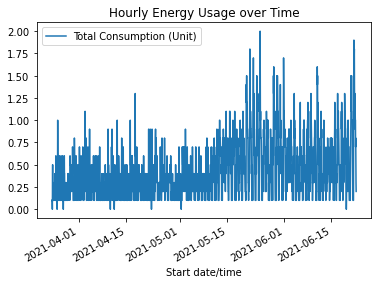

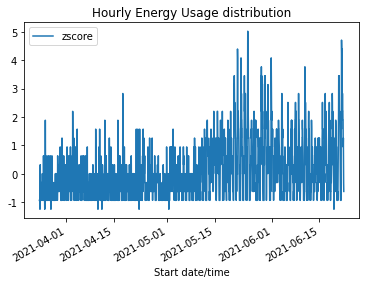

In [4]:
import matplotlib.pyplot as plt

col = df[df.columns[2]]
df_zscore = (col - col.mean())/col.std()

df1=df
df1['zscore']=df_zscore

df1=df.sort_values("zscore")

display(df1)

df1.plot(x=df.columns[0], y=df.columns[2], title="Hourly Energy Usage over Time")
df1.plot(x=df.columns[0], y="zscore", title="Hourly Energy Usage distribution")

Index(['Total Consumption (Unit)'], dtype='object')

,Total Consumption (Unit)
Start date/time,
2021-03-24,4.3
2021-03-25,5.3
2021-03-26,5.3
2021-03-27,4.5
2021-03-28,4.7
...,...
2021-06-18,14.1
2021-06-19,14.0
2021-06-20,14.1


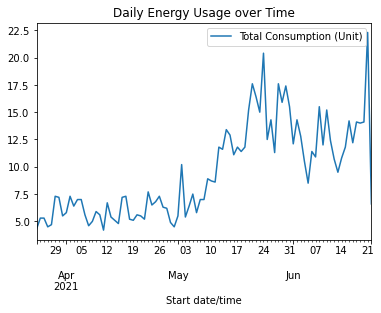

In [48]:
# group by day
dateCol = df.columns[0]
valueCol = df.columns[2]

df_day = df.groupby(pd.Grouper(key=dateCol, freq='D')).sum()

try:
    df_day.drop(columns="zscore",inplace=True)
except:
    pass

display(df_day.columns, df_day, )



df_day.plot( y=df_day.columns[0], title="Daily Energy Usage over Time")

df_day.to_csv("day_history.csv")

,Year,Month,Day,Value,Date
0,2021,1,1,11.8,2021-01-01
1,2021,1,2,14.0,2021-01-02
2,2021,1,3,16.7,2021-01-03
3,2021,1,4,18.3,2021-01-04
4,2021,1,5,18.8,2021-01-05
...,...,...,...,...,...
146,2021,5,27,30.3,2021-05-27
147,2021,5,28,30.6,2021-05-28
148,2021,5,29,30.2,2021-05-29
149,2021,5,30,30.3,2021-05-30


,Total Consumption (Unit)
Start date/time,
2021-03-24,4.3
2021-03-25,5.3
2021-03-26,5.3
2021-03-27,4.5
2021-03-28,4.7
...,...
2021-06-18,14.1
2021-06-19,14.0
2021-06-20,14.1


<bound method DataFrame.info of                  Total Consumption (Unit)
Start date/time                          
2021-03-24                            4.3
2021-03-25                            5.3
2021-03-26                            5.3
2021-03-27                            4.5
2021-03-28                            4.7
...                                   ...
2021-06-18                           14.1
2021-06-19                           14.0
2021-06-20                           14.1
2021-06-21                           22.3
2021-06-22                            6.6

[91 rows x 1 columns]>

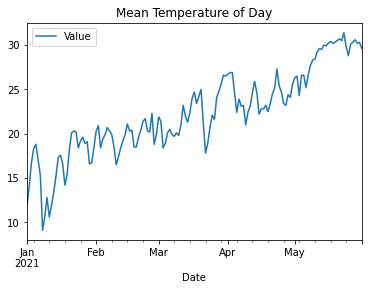

In [45]:
# weather
df_weather = pd.read_csv("weather.csv", engine='python',skiprows=2, skipfooter=3)
    
df_weather.drop(columns=df_weather.columns[-1], inplace=True)

date= pd.to_datetime(df_weather[['Day','Month','Year']])

df_weather['Date']=date;

plt1=df_weather.plot(x="Date", y="Value", title="Mean Temperature of Day")

display(df_weather, df_day)


df_day.info




Start date/time             datetime64[ns]
Total Consumption (Unit)           float64
dtype: object

'Start date/time'

Year              int64
Month             int64
Day               int64
Value           float64
Date     datetime64[ns]
dtype: object

'Date'

,Total Consumption (Unit),Date,Value
0,4.3,2021-03-24,20.7
1,5.3,2021-03-25,22.1
2,5.3,2021-03-26,21.6
3,4.5,2021-03-27,24.1
4,4.7,2021-03-28,24.8
...,...,...,...
64,11.3,2021-05-27,30.3
65,17.6,2021-05-28,30.6
66,15.9,2021-05-29,30.2
67,17.4,2021-05-30,30.3


<AxesSubplot:xlabel='Total Consumption (Unit)', ylabel='Value'>

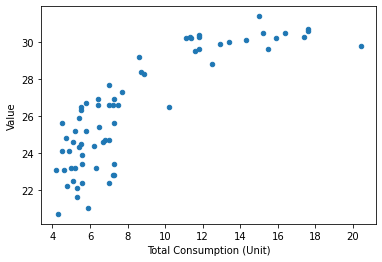

In [86]:
# compare df_day with df_weather
df_unstack = df_day.reset_index()

display(
    df_unstack.dtypes,
    df_unstack.columns[0],
    df_weather.dtypes,
    df_weather.columns[-1]
)

df_merge = df_day.merge(df_weather[['Date', 'Value']], how='inner',
                        left_on=df_unstack.columns[0], right_on=df_weather.columns[-1])

display(df_merge)

df_merge.plot.scatter(x=df_merge.columns[0], y="Value")
